This notebook is created to investigate what chemical classes exist in the filtered spectral library of MSn positive and negative

In [1]:
from matchms.importing import load_from_mgf
spectra = list(load_from_mgf("/home/ioannis/thesis_data/msn_negative_filtered.mgf"))
print(len(spectra))

86709


In [2]:
print(spectra[0].metadata)

{'charge': -1, 'description': 'ENAMMOL', 'formula': 'C17H22N6O2', 'inchi': 'InChI=1S/C17H22N6O2/c1-4-22-15-14(9-13(10-19-15)16(24)25)20-17(22)18-6-5-7-23-12(3)8-11(2)21-23/h8-10H,4-7H2,1-3H3,(H,18,20)(H,24,25)', 'smiles': 'CCn1c(NCCCn2nc(C)cc2C)nc2c1ncc(C(=O)O)c2', 'feature_id': '20240405_pluskal_enammol_5004_B7_id_MSn_negative.mzML msn trees:5', 'adduct': '[M-H]-', 'feature_ms1_height': '2.047E6', 'spectype': 'SINGLE_BEST_SCAN', 'collision_energy': '60.0', 'fragmentation_method': 'HCD', 'isolation_window': '1.2000000476839432', 'acquisition': 'Commercial', 'ims_type': 'none', 'ion_source': 'ESI', 'ionmode': 'negative', 'dataset_id': 'MSV000094528', 'usi': '[mzspec:MSV000094528:20240405_pluskal_enammol_5004_B7_id_MSn_negative:213]', 'scans': '213', 'precursor_purity': '0.9890973753859726', 'quality_chimeric': 'PASSED', 'quality_explained_intensity': '0.9891312', 'quality_explained_signals': '0.95', 'num_peaks': '20', 'compound_name': '2-{[3-(3,5-dimethyl-1H-pyrazol-1-yl)propyl]amino}-3

In [3]:
print(f'Smiles: {spectra[0].get("smiles")}')
print(f'Inchi: {spectra[0].get("inchi")}')
print(f'Description: {spectra[0].get("description")}')

Smiles: CCn1c(NCCCn2nc(C)cc2C)nc2c1ncc(C(=O)O)c2
Inchi: InChI=1S/C17H22N6O2/c1-4-22-15-14(9-13(10-19-15)16(24)25)20-17(22)18-6-5-7-23-12(3)8-11(2)21-23/h8-10H,4-7H2,1-3H3,(H,18,20)(H,24,25)
Description: ENAMMOL


In [4]:
inchikeys = []
records = []

for s in spectra:
    inchikey = s.get("inchikey")
    smiles = s.get("smiles")
    feature_id = s.get("feature_id")
    inchikeys.append(inchikey)
    records.append((feature_id, inchikey, smiles))

print(f"Total spectra: {len(spectra)}")
print(f"Unique InChIKeys: {len(set(inchikeys))}")

Total spectra: 86709
Unique InChIKeys: 23838


In [5]:
for r in records[:5]:
    print(r)


('20240405_pluskal_enammol_5004_B7_id_MSn_negative.mzML msn trees:5', 'ZWHHBRKAHNHHDN-UHFFFAOYSA-N', 'CCn1c(NCCCn2nc(C)cc2C)nc2c1ncc(C(=O)O)c2')
('20240405_pluskal_enammol_5002_G6_id_MSn_negative.mzML msn trees:11', 'DGUQEGBVTIEEKQ-UHFFFAOYSA-N', 'O=C(O)C1CCCN(C(=O)c2ccc(Cl)cc2)C1')
('20240405_pluskal_enammol_5002_G6_id_MSn_negative.mzML msn trees:11', 'DGUQEGBVTIEEKQ-UHFFFAOYSA-N', 'O=C(O)C1CCCN(C(=O)c2ccc(Cl)cc2)C1')
('20240405_pluskal_enammol_5002_O17_id_MSn_negative.mzML msn trees:2', 'GASOXLGVGBVWMG-UHFFFAOYSA-N', 'Cc1nn(C)cc1-c1nn(CC(=O)O)cc1')
('20240405_pluskal_enammol_5002_O17_id_MSn_negative.mzML msn trees:2', 'GASOXLGVGBVWMG-UHFFFAOYSA-N', 'Cc1nn(C)cc1-c1nn(CC(=O)O)cc1')


In the filtered dataset there are a lot of compounds that share the same InChIKey but have different adduct or collision energy. This characteristic is useful for the generalization of the model, but not for investigating the different chemical classes. To unburden the search for the chemical classes, deduplication of InChIKey is done.

In [6]:
from collections import Counter
import pandas as pd

# Count occurrences of each InChIKey(how many spectra correspond to the same inchikey)
all_inchikeys = [ik for _, ik, _ in records if ik]
counts = Counter(all_inchikeys)

# Build dictionary only with the unique inchikeys
unique = {}
for feature_id, ik, smiles in records:
    if not ik:
        continue
    if ik not in unique:
        unique[ik] = {
            "smiles": smiles,
            "feature_count": counts[ik]
        }

# Convert to DataFrame
unique_df = pd.DataFrame.from_dict(unique, orient="index").reset_index()
unique_df = unique_df.rename(columns={"index": "inchikey"})

print(unique_df.head())


                      inchikey                                    smiles  \
0  ZWHHBRKAHNHHDN-UHFFFAOYSA-N  CCn1c(NCCCn2nc(C)cc2C)nc2c1ncc(C(=O)O)c2   
1  DGUQEGBVTIEEKQ-UHFFFAOYSA-N         O=C(O)C1CCCN(C(=O)c2ccc(Cl)cc2)C1   
2  GASOXLGVGBVWMG-UHFFFAOYSA-N              Cc1nn(C)cc1-c1nn(CC(=O)O)cc1   
3  RUBCFBMNVLVTNK-UHFFFAOYSA-N             O=C(NC1(C(=O)O)CC1)c1ccccc1Cl   
4  XVCFDYYHZJBEBW-UHFFFAOYSA-N          Cc1ccc(S(=O)(=O)N2CCCC2C(=O)O)s1   

   feature_count  
0              1  
1              2  
2              2  
3              1  
4              3  


In [7]:
unique_inchikeys = list(unique.keys())
print(len(unique_inchikeys))
with open("unique_inchikeys.txt", "w") as f:
    for ik in unique_inchikeys:
        f.write(ik + "\n")



41568


In [7]:
print(unique_df.loc[0, "smiles"])


CCn1c(NCCCn2nc(C)cc2C)nc2c1ncc(C(=O)O)c2


In [8]:
structures_file     = "/home/ioannis/thesis_data/structures.tsv.gz"
relations_file      = "/home/ioannis/thesis_data/relation.tsv.gz"
relation_types_file = "/home/ioannis/thesis_data/relation_type.tsv.gz"
compounds_file      = "/home/ioannis/thesis_data/compounds.tsv.gz"   


In [9]:
structures = pd.read_csv(structures_file, sep="\t", compression="gzip")
relations = pd.read_csv(relations_file, sep="\t", compression="gzip")
relation_types = pd.read_csv(relation_types_file, sep="\t", compression="gzip")
compounds = pd.read_csv(compounds_file, sep="\t", compression="gzip")


/tmp/ipykernel_9078/2899065704.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  relations = pd.read_csv(relations_file, sep="\t", compression="gzip")


In [10]:
print(structures.columns.tolist())

['id', 'compound_id', 'status_id', 'molfile', 'smiles', 'standard_inchi', 'standard_inchi_key', 'dimension', 'default_structure']


In [11]:
# Here we compare the inchikey with the one from ChEBI, and if it is a match we also retrieve the compound ID.
mapped = unique_df.merge(
    structures[["compound_id", "standard_inchi_key"]],
    left_on="inchikey",
    right_on="standard_inchi_key",
    how="left"
)

print(f"Matched {mapped['compound_id'].notna().sum()} InChIKeys to ChEBI IDs")

Matched 3860 InChIKeys to ChEBI IDs


In [12]:
print(relations.columns.tolist())


['id', 'relation_type_id', 'init_id', 'final_id', 'status_id', 'evidence_accession', 'evidence_source_id']


In [13]:
print(relation_types.columns.tolist())


['id', 'code', 'allow_cycles', 'description']


In [14]:
print(compounds.columns.tolist())


['id', 'name', 'status_id', 'source', 'parent_id', 'merge_type', 'chebi_accession', 'definition', 'ascii_name', 'stars', 'modified_on', 'release_date']


In [15]:
# From relations we take the relation_type_id and we match it to relation_types to find the appropriate code
relations_named = relations.merge(
    relation_types[["id", "code"]],
    left_on="relation_type_id",
    right_on="id",
    how="left"
)

# Keep only "is_a" relationships by searching through the codes
is_a_rel = relations_named[relations_named["code"] == "is_a"]

# We link the compound_id with the init_it (child compound), that then links to the parent class. So compound_id linked to parent class
compound_classes = mapped.merge(is_a_rel, left_on="compound_id", right_on="init_id", how="left")

# We link the parent class id with the actual name
class_named = compound_classes.merge(
    compounds[["id", "name"]],
    left_on="final_id",
    right_on="id",
    how="left"
)

# Summarize class diversity (weighted by feature_count), the amount of spectra that corresponds to the same inchikey
class_counts = (
    class_named.groupby("name")["feature_count"]
    .sum()
    .sort_values(ascending=False)
)

print("\nTop 20 chemical classes (weighted by feature count):")
print(class_counts.head(20))


Top 20 chemical classes (weighted by feature count):
name
glycoside                       808
aromatic ether                  634
organofluorine compound         543
organic molecular entity        491
sulfonamide                     489
monosaccharide derivative       468
secondary amino compound        419
secondary carboxamide           414
β-<small>D</small>-glucoside    395
monocarboxylic acid amide       370
monochlorobenzenes              346
benzamides                      297
tertiary amino compound         296
phenols                         287
monocarboxylic acid             283
secondary alcohol               273
20-oxo steroid                  262
11β-hydroxy steroid             258
nitrile                         253
flavonoids                      251
Name: feature_count, dtype: int64


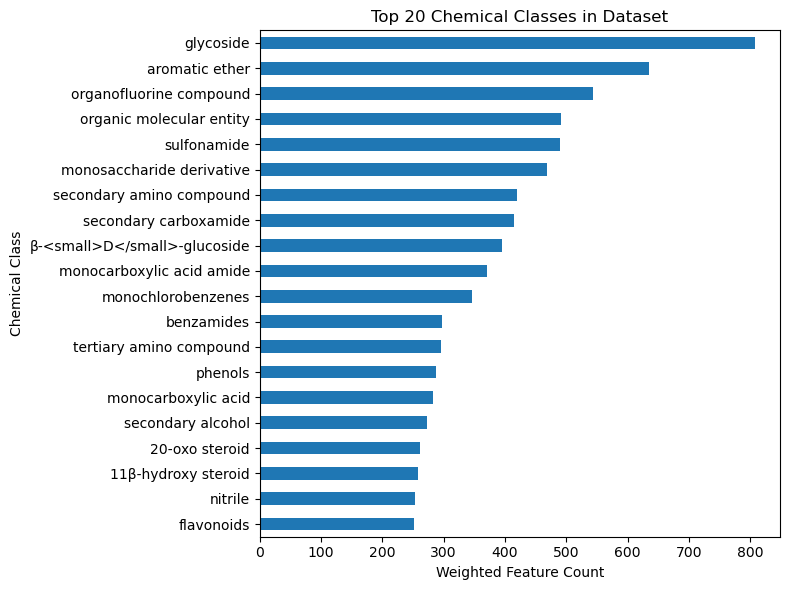

In [16]:
import matplotlib.pyplot as plt
# --- Step 5: Plot results ---
plt.figure(figsize=(8,6))
class_counts.head(20).plot(kind="barh")
plt.xlabel("Weighted Feature Count")
plt.ylabel("Chemical Class")
plt.title("Top 20 Chemical Classes in Dataset")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [17]:
n_total = unique_df.shape[0]
n_mapped = mapped["compound_id"].notna().sum()
# --- Step 6: Coverage summary ---
n_classified = class_named["name"].notna().sum()
print(f"\nCoverage: {n_classified} compounds assigned to at least one class "
      f"({n_classified/n_total:.1%} of all unique InChIKeys)")


Coverage: 8366 compounds assigned to at least one class (35.1% of all unique InChIKeys)


In [18]:
# Drop duplicates so each compound counts only once per class
unique_class_assignments = class_named[["compound_id", "name"]].drop_duplicates()

# Count unique compounds per class (unweighted)
class_counts_unweighted = (
    unique_class_assignments.groupby("name")["compound_id"]
    .nunique()
    .sort_values(ascending=False)
)

print("\nTop 20 chemical classes (unweighted, unique compounds only):")
print(class_counts_unweighted.head(20))


Top 20 chemical classes (unweighted, unique compounds only):
name
glycoside                       198
aromatic ether                  146
organic molecular entity        111
sulfonamide                     110
secondary amino compound         98
β-<small>D</small>-glucoside     94
monosaccharide derivative        93
secondary carboxamide            92
organofluorine compound          89
monocarboxylic acid              84
monochlorobenzenes               76
benzamides                       75
phenols                          73
flavonoids                       68
monocarboxylic acid amide        61
organochlorine compound          60
polyphenol                       59
triterpenoid saponin             59
nitrile                          57
tertiary amino compound          56
Name: compound_id, dtype: int64


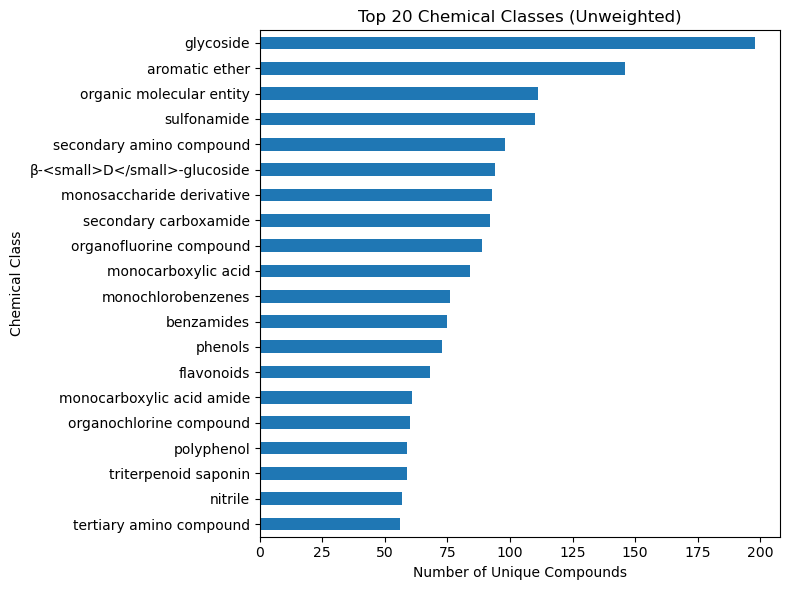

In [19]:
plt.figure(figsize=(8,6))
class_counts_unweighted.head(20).plot(kind="barh")
plt.xlabel("Number of Unique Compounds")
plt.ylabel("Chemical Class")
plt.title("Top 20 Chemical Classes (Unweighted)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [20]:
n_total = unique_df.shape[0]
n_mapped = mapped["compound_id"].notna().sum()
n_classified = unique_class_assignments["compound_id"].nunique()

print(f"Total unique InChIKeys: {n_total}")
print(f"Mapped to ChEBI IDs: {n_mapped} ({n_mapped/n_total:.1%})")
print(f"Assigned to at least one class: {n_classified} ({n_classified/n_total:.1%})")


Total unique InChIKeys: 23838
Mapped to ChEBI IDs: 3860 (16.2%)
Assigned to at least one class: 3860 (16.2%)
